# Chapter 5 K-Means Clustering for anomaly detection

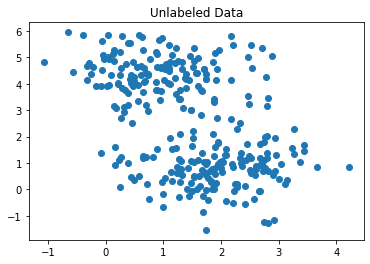

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=0)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1])

plt.title('Unlabeled Data')
plt.show()

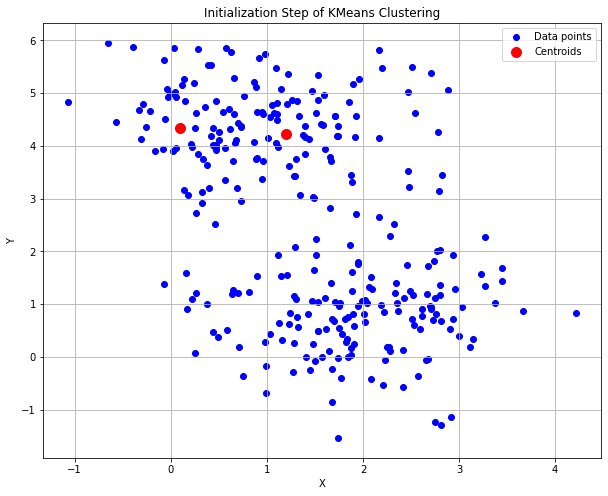

In [19]:
# Step 1: Initialization
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=0)

# Randomly select 2 data points as initial centroids
np.random.seed(3)
random_indices = np.random.choice(len(X), size=2, replace=False)
centroids = X[random_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.title('Initialization Step of KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

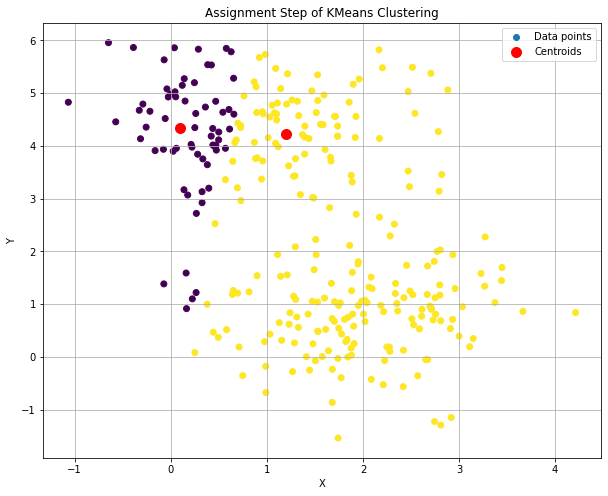

In [20]:
# Step 2: Assignment
# Calculate the Euclidean distance between each point and each centroid
distances_to_centroids = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

# Assign each point to the nearest centroid
closest_centroid_indices = np.argmin(distances_to_centroids, axis=0)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=closest_centroid_indices, cmap='viridis', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.title('Assignment Step of KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

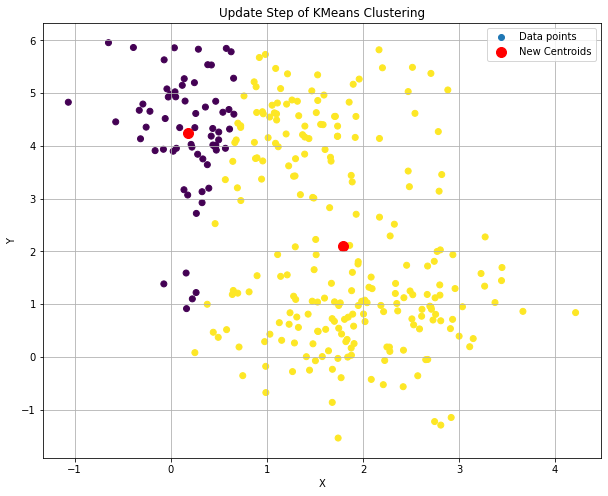

In [21]:
# Step 3: Update
# Calculate new centroids as the mean position of all points in each cluster
new_centroids = np.array([X[closest_centroid_indices==k].mean(axis=0) for k in range(centroids.shape[0])])

# Plotting with new centroids
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=closest_centroid_indices, cmap='viridis', label='Data points')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=100, label='New Centroids')
plt.title('Update Step of KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

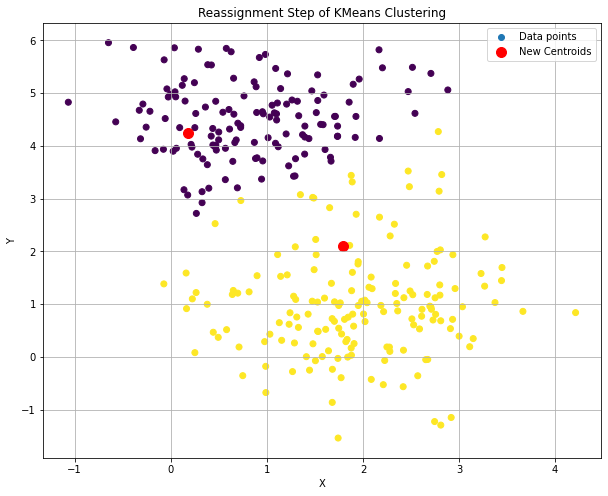

In [22]:
# Step 4: Repeat step 2
# Calculate the Euclidean distance between each point and each new centroid
distances_to_new_centroids = np.sqrt(((X - new_centroids[:, np.newaxis])**2).sum(axis=2))

# Assign each point to the nearest new centroid
closest_new_centroid_indices = np.argmin(distances_to_new_centroids, axis=0)

# Plotting with new assignments
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=closest_new_centroid_indices, cmap='viridis', label='Data points')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=100, label='New Centroids')
plt.title('Reassignment Step of KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

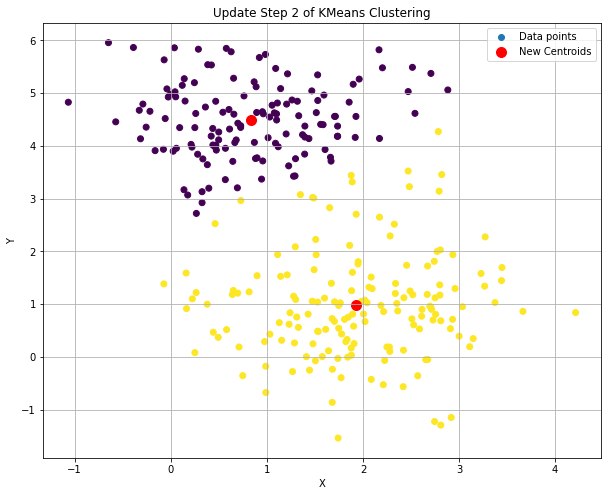

In [23]:
# Step 4: Repeat step 3
# Calculate new centroids as the mean position of all points in each new cluster
new_centroids_2 = np.array([X[closest_new_centroid_indices==k].mean(axis=0) for k in range(new_centroids.shape[0])])

# Plotting with the new centroids
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=closest_new_centroid_indices, cmap='viridis', label='Data points')
plt.scatter(new_centroids_2[:, 0], new_centroids_2[:, 1], c='red', s=100, label='New Centroids')
plt.title('Update Step 2 of KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

... this continues until no assignment changes

## Using KMeans from sklearn library

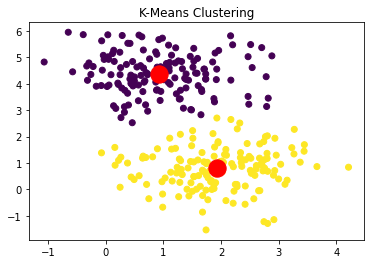

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=0)

# Run K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.title('K-Means Clustering')
plt.show()

# Anomaly Detection with K-Means

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = pd.read_csv('creditcard.csv')

In [24]:
# Separate out the features and labels
X = data.drop('Class', axis=1)
y = data['Class']

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [26]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
# Standardize the features to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [28]:
X_std

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [29]:
# Apply PCA to reduce dimensions 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [30]:
X_pca

array([[ 0.43033622, -2.52202733],
       [-0.39434216, -2.08098747],
       [ 1.88751649, -2.51315374],
       ...,
       [-0.19850417,  2.11503808],
       [-0.46319017,  1.2238196 ],
       [ 0.77609101,  1.90081084]])

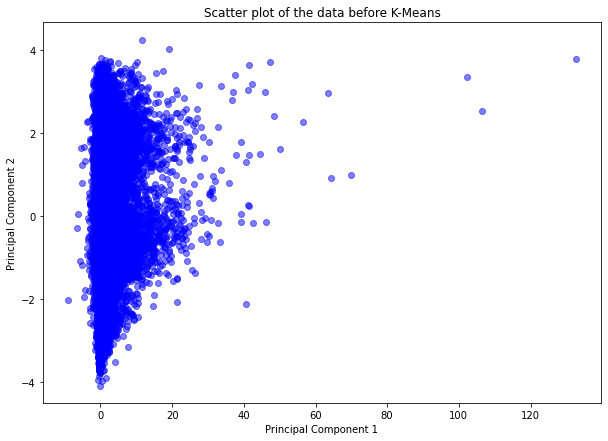

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c='blue', alpha=0.5)
plt.title('Scatter plot of the data before K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
# Define the K-means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the PCA-reduced data
kmeans.fit(X_pca)

KMeans(n_clusters=2, random_state=42)

In [33]:
# Predict the cluster labels: labels
labels = kmeans.predict(X_pca)

In [34]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 156707, 1: 128100}


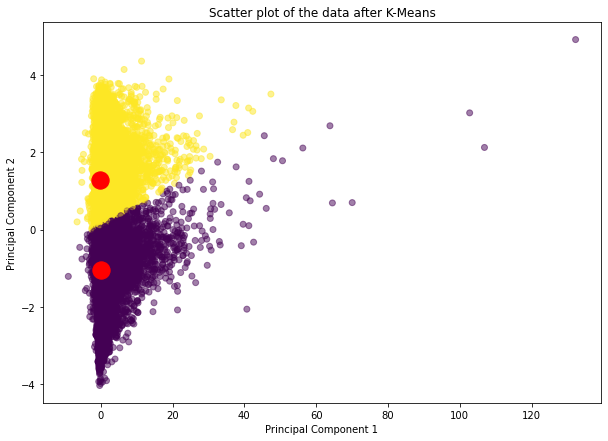

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Scatter plot of the data after K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
# Compute the distances to the cluster centers
distances = kmeans.transform(X_pca)

In [37]:
distances

array([[1.52044216, 3.84096184],
       [1.12871036, 3.38210693],
       [2.34306172, 4.27500584],
       ...,
       [3.17305605, 0.83867047],
       [2.33068922, 0.39511549],
       [3.03417374, 1.04838977]])

In [38]:
# Compute the anomaly score (distance to the closest centroid)
scores = distances.min(axis=1)

In [39]:
scores

array([1.52044216, 1.12871036, 2.34306172, ..., 0.83867047, 0.39511549,
       1.04838977])

In [40]:
# Print the first 10 anomaly scores
print(scores[:10])

[1.52044216 1.12871036 2.34306172 0.76333104 0.47587477 1.10576802
 0.65864807 0.19072126 0.09225452 0.89915189]


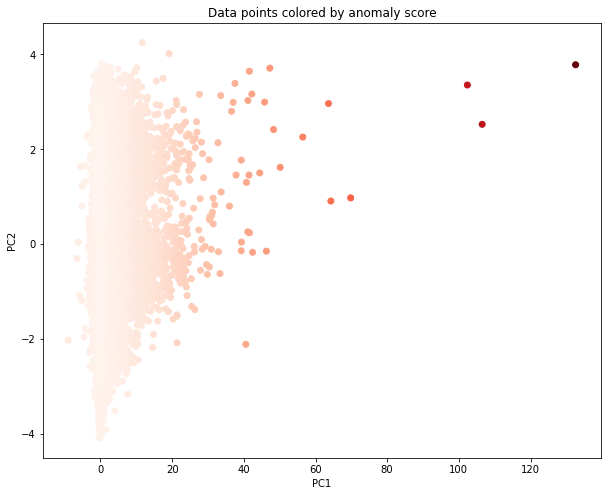

In [41]:
# Define the color map to convert scores to colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a color map that maps scores to colors
cmap = cm.get_cmap("Reds")

# Normalize the scores to the range [0, 1] for color mapping
normalized_scores = (scores - min(scores)) / (max(scores) - min(scores))

# Create a scatter plot of the PCA-transformed data with points colored by anomaly score
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(normalized_scores))
# plt.colorbar(label='Anomaly score')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data points colored by anomaly score')
plt.show()

In [42]:
normalized_scores

array([0.01145744, 0.00850301, 0.01766162, ..., 0.00631554, 0.00297026,
       0.00789724])

In [43]:
# Convert the normalized scores to a pandas series
normalized_scores_series = pd.Series(normalized_scores, name='Anomaly_Score')

# Concatenate the original DataFrame with the normalized scores
data_with_scores = pd.concat([data.reset_index(drop=True), normalized_scores_series], axis=1)

In [44]:
data_with_scores[['Time','V1','V2','V3','Amount','Class', 'Anomaly_Score']]

,Time,V1,V2,V3,Amount,Class,Anomaly_Score
0,0.0,-1.359807,-0.072781,2.536347,149.62,0,0.011457
1,0.0,1.191857,0.266151,0.166480,2.69,0,0.008503
2,1.0,-1.358354,-1.340163,1.773209,378.66,0,0.017662
3,1.0,-0.966272,-0.185226,1.792993,123.50,0,0.005747
4,2.0,-1.158233,0.877737,1.548718,69.99,0,0.003579
...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,0.77,0,0.011273
284803,172787.0,-0.732789,-0.055080,2.035030,24.79,0,0.004090
284804,172788.0,1.919565,-0.301254,-3.249640,67.88,0,0.006316
284805,172788.0,-0.240440,0.530483,0.702510,10.00,0,0.002970


In [45]:
grouped_data = data_with_scores.groupby('Class')['Anomaly_Score'].agg(['count', 'mean'])
print(grouped_data)

        count      mean
Class                  
0      284315  0.006233
1         492  0.008536


The difference between the mean anomaly scores of the two classes is indeed noticeable, but in order to statistically test if this difference is significant, we can perform a two-sample t-test.

The two-sample t-test is used to determine if two population means are equal. The main assumptions of the test are that the two samples are independent, they are normally distributed, and they have the same variance.

Keep in mind that the t-test is sensitive to the normality assumption, and given that the scores are bounded in the interval [0, 1], they might not follow a normal distribution. You could use a non-parametric test, like Mann-Whitney U test, which does not require the assumption of normal distribution.

Here's how you could apply both tests in python:

In [103]:
from scipy.stats import ttest_ind, mannwhitneyu

# Separating the scores for both classes
scores_class_0 = data_with_scores[data_with_scores['Class']==0]['Anomaly_Score']
scores_class_1 = data_with_scores[data_with_scores['Class']==1]['Anomaly_Score']

# Two-sample t-test
t_stat, p_val_t = ttest_ind(scores_class_0, scores_class_1)
print("t-test p-value: ", p_val_t)

# Mann-Whitney U test
u_stat, p_val_u = mannwhitneyu(scores_class_0, scores_class_1, alternative='two-sided')
print("Mann-Whitney U test p-value: ", p_val_u)

t-test p-value:  1.8125292456077149e-12
Mann-Whitney U test p-value:  1.7802027651503242e-24


A small p-value (typically ≤ 0.05) indicates strong evidence that the groups have different means, so you reject the null hypothesis that the means are the same.

In [106]:
data_with_scores.sort_values(by="Anomaly_Score", ascending=False).head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly_Score
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0,1.000000
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0,0.810535
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0,0.779227
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0,0.531237
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0,0.489326
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0,0.484415
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0,0.426227
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,...,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0,0.384003
228158,145381.0,-13.710746,-21.177912,-9.340628,8.385815,-22.756016,14.435314,28.239528,-2.201819,-4.713335,...,-0.045682,19.228169,-1.420447,2.351701,-0.353840,-2.608043,0.804099,8182.70,0,0.365132
245474,152763.0,-14.641710,-28.554825,-12.714462,5.878264,-7.855074,2.471004,11.922577,-2.651203,-2.223985,...,-3.269671,-8.024556,0.423021,-2.396701,-0.633380,-1.763704,1.422017,8787.00,0,0.360394
